<h1> <b> ATELIER PRATIQUE: COMPTAGE DES ELEPHANTS DANS UN PARC </b></h1>
<hr>

<table>
    <tr>
        <td><img src="https://indabax.chadainetwork.org/wp-content/uploads/2024/09/logo_IndabaX_Chad_AI_Network.png.webp" alt="Image description" width="350px"></td>
        <td>
          <h1>
            <b>IndabaX Chad</b>
          </h1>
          <br>
          <p>
            Inspired by AI, shaping the future.
          </p>
        </td>
    </tr>
</table>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*oszZKN3xhFCW_DhcelKZdw.jpeg" width="100%">
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5IFBXxpt8NjbQKFDCrls22opXdR5T5hjm1Q&s" width="100%">

© IndabaX Chad 2024. Apache License 2.0.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1yqSH0B4uplpSsqV8i7kgqeeplYmoVmxk)


**Auteur:** <a href="https://beria-kalpelbe.github.io">Beria Chingnabe Kalpelbe</a>

**Revisions:**    

**Introduction:**

Ce notebook présente un pipeline de comptage d'objets utilisant un modèle d'apprentissage profond.
Il couvre les étapes suivantes :

1. **Chargement et Prétraitement des Données :** Chargement et préparation d'un jeu de données d'images et de leurs comptages d'objets correspondants. (Vous devrez peut-être décrire le jeu de données spécifique utilisé).
2. **Entraînement du Modèle :** Entraînement d'un modèle d'apprentissage profond pour prédire le nombre d'objets à partir d'images. (Spécifiez l'architecture du modèle, par exemple, YOLO, Faster R-CNN).
3. **Prédiction et Évaluation :** Utilisation du modèle entraîné pour effectuer des prédictions sur un jeu de données de test et évaluation de ses performances à l'aide de l'Erreur Quadratique Moyenne (EQM).
4. **Visualisation :** (Facultatif) Visualisation des prédictions du modèle et comparaison avec les valeurs réelles.

**Concepts Clés :**

* **Détection d'Objets :** Identifier et localiser les objets dans une image.
* **Régression :** Prédire une valeur continue, dans ce cas, le nombre d'objets.
* **Erreur Quadratique Moyenne (EQM) :** Une métrique pour évaluer la précision des modèles de régression.
* **Traitement par Lots :** Traitement des images par lots pour améliorer l'efficacité.

**Objectifs :**

* Construire un modèle d'apprentissage profond capable de compter avec précision les objets dans les images.
* Évaluer les performances du modèle à l'aide de métriques pertinentes.
* Acquérir des connaissances sur le processus de comptage d'objets et les défis potentiels.




In [ ]:
!nvidia-smi

Sat Oct 26 12:49:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              36W /  70W |   2179MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import zipfile
colab = True
if colab:
    from google.colab import drive
    from pydrive2.auth import GoogleAuth
    from pydrive2.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    # Google Authentication
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    # Download data files
    downloaded = drive.CreateFile({'id':"1wVgwELf2t9FYAVK_w2gtPegH0YSzCUJB"})
    downloaded.GetContentFile('african-wildlife.zip')
# Extract files to temporary location in Google Drive
with zipfile.ZipFile('african-wildlife.zip', 'r') as zip_file:
    zip_file.extractall()

In [ ]:
import os
import glob

def remove_files_with_prefix(root_path, prefix):
    # List of subdirectories to clean up
    subfolders = ['train', 'test', 'valid']
    subdirectories = ['images', 'labels']

    for folder in subfolders:
        for subfolder in subdirectories:
            folder_path = os.path.join(root_path, folder, subfolder)
            file_pattern = os.path.join(folder_path, f"{prefix}*")  # Match files with the given prefix

            # Get the list of files matching the pattern
            files_to_remove = glob.glob(file_pattern)

            # Loop through the files and remove them
            for file_path in files_to_remove:
                try:
                    os.remove(file_path)
                    # print(f"Removed: {file_path}")
                except OSError as e:
                    print(f"Error removing {file_path}: {e.strerror}")

root_path = "/content/"  # Replace with your dataset root folder
remove_files_with_prefix(root_path, prefix='1')
remove_files_with_prefix(root_path, prefix='3')
remove_files_with_prefix(root_path, prefix='4')

In [ ]:
import cv2
import numpy as np
import os

def load_image(image_path):
    """Load an image from the given path."""
    image = cv2.imread(image_path)
    return image

In [ ]:
elephant_244 = load_image('/content/train/images/2 (244).jpg')
print(elephant_244)

[[[225 201 183]
  [225 201 183]
  [225 201 183]
  ...
  [226 198 181]
  [226 198 181]
  [226 198 181]]

 [[225 201 183]
  [225 201 183]
  [225 201 183]
  ...
  [226 198 181]
  [226 198 181]
  [226 198 181]]

 [[224 200 182]
  [224 200 182]
  [224 200 182]
  ...
  [226 198 181]
  [226 198 181]
  [226 198 181]]

 ...

 [[ 49 105  84]
  [ 52 107  88]
  [ 55 106  92]
  ...
  [ 76  85 105]
  [ 76  85 105]
  [ 77  86 106]]

 [[ 48 109  89]
  [ 48 109  89]
  [ 48 105  90]
  ...
  [ 71  80 100]
  [ 71  80 100]
  [ 73  82 102]]

 [[ 48 111  91]
  [ 42 104  86]
  [ 39  98  83]
  ...
  [ 66  75  95]
  [ 67  76  96]
  [ 69  78  98]]]


In [ ]:
print(elephant_244.shape)

(848, 1272, 3)


In [ ]:
import matplotlib.pyplot as plt

def display_image(image):
    """Display an image using matplotlib."""
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

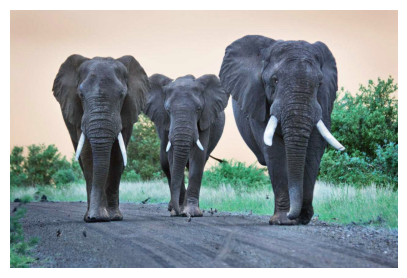

In [ ]:
display_image(elephant_244)

In [ ]:
def load_annotations(annotation_path):
    """Load bounding box annotations from a text file."""
    with open(annotation_path, 'r') as file:
        annotations = [line.strip().split() for line in file.readlines()]
    return annotations

In [ ]:
label_244 = load_annotations('/content/train/labels/2 (244).txt')
print(label_244)

[['1', '0.234375', '0.494595', '0.257813', '0.648649'], ['1', '0.451562', '0.525676', '0.237500', '0.562162'], ['1', '0.700781', '0.462838', '0.329687', '0.736486']]


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



def plot_image_with_boxes(image, boxes, class_names=None):
    """Plot an image with bounding boxes drawn around objects.

    Args:
        image: The input image (in NumPy array format).
        boxes: A list or array of bounding boxes in the format
               [[class_id, x_center, y_center, width, height], ...] with normalized coordinates.
        class_names: A list of class names corresponding to class_id, optional.
    """
    # Make a copy of the image to draw bounding boxes
    image_copy = image.copy()
    h, w, _ = image_copy.shape

    if image_copy.dtype != np.uint8:
        image_copy = (image_copy * 255).astype(np.uint8)

    for box in boxes:
        class_id, x_center, y_center, width, height = box

        # Convert normalized coordinates back to image coordinates
        x_center = int(float(x_center) * w)
        y_center = int(float(y_center) * h)
        width = int(float(width) * w)
        height = int(float(height) * h)

        # Calculate the top-left and bottom-right corners of the bounding box
        x_min = int(x_center - width / 2)
        y_min = int(y_center - height / 2)
        x_max = int(x_center + width / 2)
        y_max = int(y_center + height / 2)

        # Draw the bounding box as a rectangle on the image
        cv2.rectangle(image_copy, (x_min, y_min), (x_max, y_max), color=(0, 0, 0), thickness=2)

        # Add class label to the bounding box if class names are provided
        if class_names and int(class_id) < len(class_names):
            label = class_names[int(class_id)]
            cv2.putText(image_copy, label, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    # Convert BGR (OpenCV default) to RGB for matplotlib
    image_rgb = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

    # Plot the image with bounding boxes
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

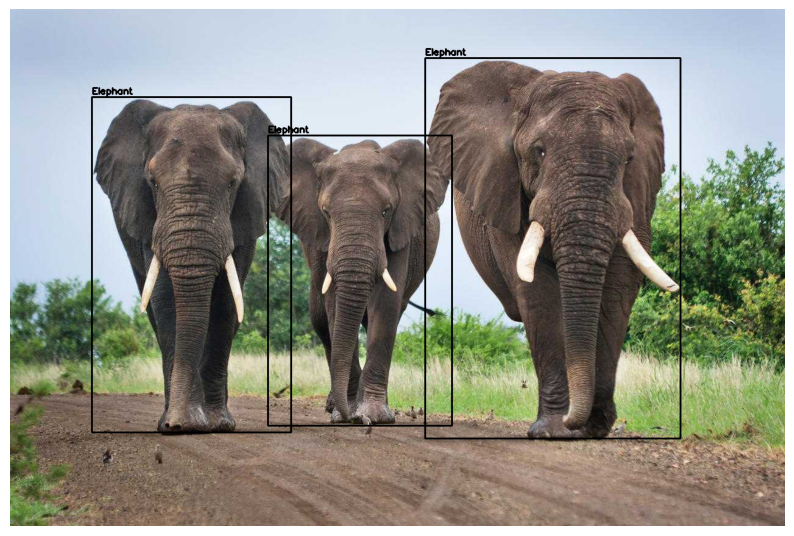

In [ ]:
boxes = np.array([element[1:] for element in label_244], dtype=np.float64)

# Example class names for labels (optional)
class_names = [element[0] for element in label_244]

# Plot image with bounding boxes
plot_image_with_boxes(elephant_244, label_244, class_names=['Elephant']*3)

In [ ]:
def preprocess_image(image, target_size):
    """Resize and normalize the image."""
    image_resized = cv2.resize(image, target_size)
    image_normalized = image_resized / 255.0  # Normalize to [0, 1]
    return image_normalized

In [ ]:
new_shape = (224, 224)
elephant_244_preprocessed = preprocess_image(image=elephant_244, target_size=new_shape)
print(elephant_244_preprocessed.shape)

(224, 224, 3)


In [ ]:
print(elephant_244_preprocessed.shape)

(224, 224, 3)


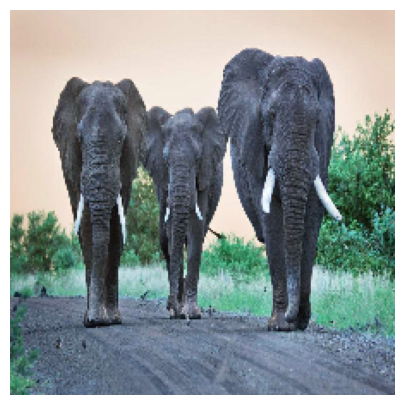

In [ ]:
display_image(elephant_244_preprocessed)

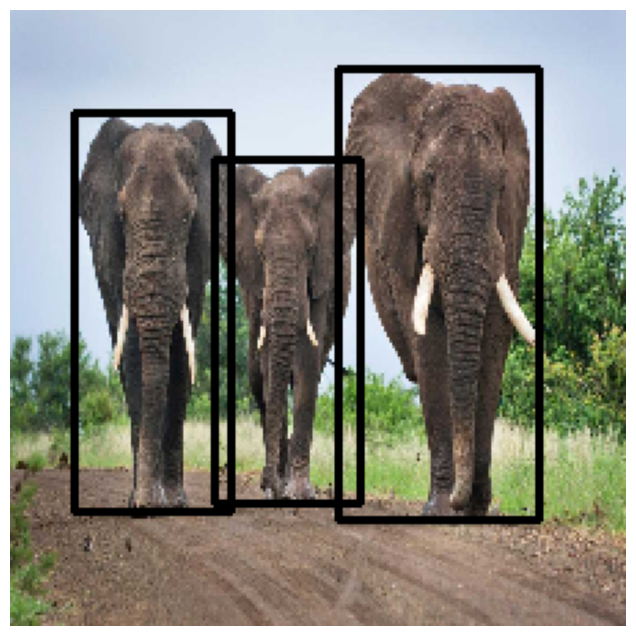

In [ ]:
plot_image_with_boxes(elephant_244_preprocessed, label_244)

In [ ]:
import tensorflow as tf
from PIL import Image
import os
import numpy as np
import pandas as pd

class CustomDataset(tf.keras.utils.Sequence):
    def __init__(self, annotations_dir, img_dir, batch_size, img_size, max_num_boxes, **kwargs):
        super().__init__(**kwargs)
        self.annotations_dir = annotations_dir
        self.img_dir = img_dir
        self.batch_size = batch_size
        self.img_size = img_size
        self.max_num_boxes = max_num_boxes  # Maximum number of bounding boxes per image
        self.image_paths = self.get_image_paths()
        self.annotations = self.get_annotations()

    def get_image_paths(self):
        return [os.path.join(self.img_dir, filename) for filename in os.listdir(self.img_dir)]

    def load_image(self, image_path):
      image = cv2.imread(image_path)
      return image

    def preprocess_image(dself, image, target_size):
      image_resized = cv2.resize(image, target_size)
      image_normalized = image_resized / 255.0  # Normalize to [0, 1]
      return image_normalized

    def get_annotations(self):
        # Load annotations from files
        annotations = []
        for annotation_file in os.listdir(self.annotations_dir):
            image_annotation = []
            with open(os.path.join(self.annotations_dir, annotation_file), 'r') as file:
                for line in file.readlines():
                    box_data = list(map(float, line.strip().split()))
                    image_annotation.append(box_data)
            annotations.append(image_annotation)
        return annotations

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, idx):
        batch_image_paths = self.image_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        images = []
        bboxes = np.zeros((self.batch_size, self.max_num_boxes * (4 + 1)))  # Initialize y_train shape

        for i, img_path in enumerate(batch_image_paths):
            try:
                img = self.load_image(img_path)
                img = self.preprocess_image(img, self.img_size)
                images.append(img)
                annotation = self.annotations[i]  # Get annotations for this image
                for j, box in enumerate(annotation):
                    if j < self.max_num_boxes:  # Ensure we don't exceed max bounding boxes
                        bboxes[i, j * 5:(j + 1) * 5] = box
            except (IOError, ValueError) as e:
                print(f"Error loading image: {img_path}")
                print(f"Error message: {e}")
                raise

        return tf.convert_to_tensor(images), tf.convert_to_tensor(bboxes)

La cellule suivante définit la fonction `create_y_train`, qui est utilisée pour préparer le tableau des cibles (`y_train`) pour l'entraînement d'un modèle de détection d'objets. Cette fonction prend en entrée les annotations des boîtes englobantes et le nombre maximal de boîtes autorisées par image. Voici un aperçu de son fonctionnement :

1. **Initialisation de `y_train`** : La fonction commence par initialiser un tableau `y_train` de zéros. Sa forme est `(num_samples, max_num_boxes * (4 + 1))`, où `num_samples` représente le nombre total d'échantillons (images) et `max_num_boxes` est le nombre maximal de boîtes englobantes autorisées pour chaque image. Chaque boîte est représentée par cinq valeurs : les coordonnées de la boîte (x_min, y_min, x_max, y_max) et une valeur d'identification de la classe.

2. **Remplissage des Données** : La fonction itère à travers les annotations de chaque échantillon. Pour chaque boîte englobante, elle vérifie si le nombre de boîtes n'excède pas le maximum autorisé. Si c'est le cas, les données de la boîte (coordonnées et classe) sont ajoutées à `y_train` à la position appropriée.

3. **Retour du Résultat** : Une fois que toutes les annotations ont été traitées, la fonction retourne le tableau `y_train`, qui peut ensuite être utilisé comme cible pour l'entraînement du modèle.

Cette fonction est essentielle pour structurer les données de sortie afin qu'elles soient prêtes pour l'apprentissage automatique, en s'assurant que chaque échantillon d'entraînement a la forme correcte.


In [ ]:
import numpy as np

def create_y_train(annotations, max_num_boxes):
    num_samples = len(annotations)
    y_train = np.zeros((num_samples, max_num_boxes * (4 + 1)))  # Initialize y_train

    for i, boxes in enumerate(annotations):
        for j, box in enumerate(boxes):
            if j < max_num_boxes:  # Ensure we do not exceed the max number of boxes
                y_train[i, j * 5:(j + 1) * 5] = box  # Fill in the bounding box data
    return y_train

Ensuite, creons nos bases de donnees pour l'entrainement et la validation du modele.

In [ ]:
batch_size = 16
input_size = (224, 224)
max_num_boxes = 10
training_dataset = CustomDataset(
    annotations_dir='/content/train/labels',
    img_dir='/content/train/images',
    batch_size=batch_size,
    img_size=input_size,
    max_num_boxes = max_num_boxes
  )

validation_dataset = CustomDataset(
    annotations_dir='/content/valid/labels',
    img_dir='/content/valid/images',
    batch_size=batch_size,
    img_size=input_size,
    max_num_boxes = max_num_boxes
  )

# 3. Creation du modele

Ici nous definissons la fonction `create_object_detection_model`, qui construit un modèle de détection d'objets à l'aide de l'API Keras de TensorFlow. Ce modèle est conçu pour traiter des images en entrée et produire des prédictions concernant les boîtes englobantes des objets détectés. Voici un aperçu de son fonctionnement :

1. **Définition de l'Entrée** : La fonction commence par définir une couche d'entrée avec une forme spécifiée, qui inclut les dimensions de l'image et le nombre de canaux (3 pour les images RGB).

2. **Couches Convolutionnelles** :
   - Le modèle utilise deux couches convolutionnelles (`Conv2D`) avec des filtres réduits pour extraire les caractéristiques des images. La première couche a 32 filtres et la seconde 64 filtres, chacune suivie d'une couche de pooling maximale (`MaxPooling2D`) pour réduire la dimensionnalité des caractéristiques extraites.
   - Ces couches permettent au modèle d'apprendre des représentations hiérarchiques des objets présents dans les images.

3. **Aplatissement des Caractéristiques** : Après les couches convolutionnelles, les données sont aplaties à l'aide d'une couche `Flatten`, transformant la sortie en un vecteur unidimensionnel, ce qui est nécessaire pour les couches denses suivantes.

4. **Couche Dense Réduite** : Une couche dense (`Dense`) avec 128 neurones est ajoutée pour interpréter les caractéristiques extraites et pour capturer des relations complexes entre celles-ci.

5. **Couche de Sortie** : La couche de sortie est une couche dense qui prédit les coordonnées des boîtes englobantes pour les objets détectés, où le nombre de sorties est déterminé par le nombre maximal de boîtes (`num_boxes`). La fonction d'activation `sigmoid` est utilisée pour normaliser les prédictions, ce qui est approprié pour les coordonnées des boîtes.

6. **Création du Modèle** : Enfin, le modèle est créé en spécifiant les couches d'entrée et de sortie.

Cette fonction permet de construire rapidement un modèle de détection d'objets, prêt à être entraîné avec des images et leurs annotations correspondantes.


In [ ]:
from tensorflow.keras import layers, models, Input

def create_object_detection_model(input_shape, num_boxes):
    # Define input layer with specified shape
    input_layer = Input(shape=input_shape + (3,))  # Assuming RGB images

    # Reduced convolutional layers
    x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)  # Single Conv2D layer
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu')(x)  # Fewer filters
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)  # Flattening layer

    # Reduced dense layer
    x = layers.Dense(128, activation='relu')(x)  # Fewer neurons in Dense layer

    # Output layer
    output_layer = layers.Dense(num_boxes * (4 + 1), activation='sigmoid')(x)

    # Create model
    model = models.Model(inputs=input_layer, outputs=output_layer)

    return model

Avant d'entrainer notre modele sur les donnees, nous avons besoin de definir la fonction de perte propre a notre cas d'etude. La fonction `custom_object_detection_loss`,  calcule la perte totale en combinant deux types de pertes : la perte de localisation et la perte de classification. Voici un aperçu de son fonctionnement :

1. **Entrées de la Fonction** : La fonction prend en entrée deux arguments : `y_true` et `y_pred`, qui représentent respectivement les annotations réelles (cibles) et les prédictions du modèle. Ces tensors sont supposés avoir une forme de `(batch_size, num_boxes * (4 + 1))`, où chaque boîte est décrite par quatre coordonnées (x_min, y_min, x_max, y_max) et une probabilité de présence de la classe.

2. **Masquage des Valeurs Nuls** :
   - Un masque est créé pour exclure les valeurs nulles (0) dans `y_true` et `y_pred`, ce qui permet de se concentrer uniquement sur les prédictions et les cibles valides.
   - Les coordonnées des boîtes et les probabilités de présence des classes sont ensuite extraites à partir des tensors masqués.

3. **Calcul de la Perte de Localisation** :
   - La perte de localisation est calculée en utilisant l'erreur quadratique moyenne (Mean Squared Error, MSE) entre les boîtes véritables (`true_boxes`) et les boîtes prédites (`pred_boxes`). Cette mesure quantifie la précision des prédictions de localisation des objets.

4. **Calcul de la Perte de Classification** :
   - La perte de classification est calculée à l'aide de l'entropie croisée binaire (Binary Cross-Entropy) entre les probabilités de présence de classe réelles (`true_probs`) et prédites (`pred_probs`). Cela évalue la capacité du modèle à prédire la présence ou l'absence des objets.

5. **Combinaison des Pertes** :
   - Les deux pertes (localisation et classification) sont combinées pour obtenir la perte totale. Des poids peuvent être ajustés si nécessaire pour équilibrer l'importance des deux types de perte selon le cas d'utilisation.

Cette fonction de perte personnalisée est essentielle pour guider l'apprentissage du modèle de détection d'objets, en fournissant des rétroactions précises sur les performances des prédictions de localisation et de classification.


In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K

num_boxes = 10


def custom_object_detection_loss(y_true, y_pred):
    # Assume y_true and y_pred are shaped (batch_size, num_boxes * (4 + 1))

    # Create a mask to identify non-zero elements
    mask = tf.not_equal(y_true, 0)

    # Get the indices of non-zero elements
    indices = tf.where(mask)

    # Extract the non-zero values using tf.gather_nd
    y_true_masked = tf.gather_nd(y_true, indices)
    y_pred_masked = tf.gather_nd(y_pred, indices)

    # Reshape the masked tensors to their original shape
    y_true_masked = tf.reshape(y_true_masked, [-1, num_boxes * (4 + 1)])
    y_pred_masked = tf.reshape(y_pred_masked, [-1, num_boxes * (4 + 1)])

    # Split the true and predicted values
    true_boxes = y_true_masked[:, :num_boxes * 4]
    true_probs = y_true_masked[:, num_boxes * 4:]
    pred_boxes = y_pred_masked[:, :num_boxes * 4]
    pred_probs = y_pred_masked[:, num_boxes * 4:]

    # Calculate localization loss (Mean Squared Error for bounding box)
    localization_loss = K.mean(K.square(true_boxes - pred_boxes))

    # Calculate classification loss (Binary Cross-Entropy for class presence)
    classification_loss = K.binary_crossentropy(true_probs, pred_probs)

    # Combine the losses (you may want to adjust the weights)
    total_loss = localization_loss + classification_loss

    return total_loss

In [ ]:
model = create_object_detection_model(input_size, num_boxes=num_boxes)
model.compile(optimizer='adam', loss=custom_object_detection_loss)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           6,450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,913,842 (91.22 MB)

 Trainable params: 23,913,842 (91.22 MB)

 Non-trainable params: 0 (0.00 B)

# 4. Entrainement du modele

Le modele etant definit, nous devons l'entrainer pour pouvoir l'utiliser.
La cellule suivante exécute l'entraînement du modèle de détection d'objets en utilisant la méthode `fit` de Keras. Cette méthode est essentielle pour ajuster les paramètres du modèle aux données d'entraînement. Voici un aperçu de son fonctionnement :

1. **Données d'Entraînement** : La variable `training_dataset` contient les données d'entraînement, qui incluent à la fois les images et les annotations des boîtes englobantes. Ces données sont préparées à l'aide de la classe `CustomDataset` que nous avons définie précédemment.

2. **Époques d'Entraînement** : Le modèle est configuré pour s'entraîner sur 30 époques. Une époque correspond à un passage complet à travers l'ensemble des données d'entraînement. Pendant chaque époque, le modèle apprend à minimiser la fonction de perte, en ajustant ses poids.

3. **Données de Validation** : La variable `validation_dataset` contient les données de validation, qui sont utilisées pour évaluer les performances du modèle à chaque époque. Les données de validation aident à vérifier si le modèle généralise bien et à prévenir le surapprentissage.

4. **Suivi de l'Histoire** : La variable `history` enregistrera les métriques d'entraînement et de validation à chaque époque, telles que la perte et la précision. Ces informations peuvent être utilisées pour visualiser les performances du modèle et identifier d'éventuels problèmes.

L'exécution de cette cellule lancera le processus d'apprentissage du modèle, lui permettant de s'ajuster progressivement aux caractéristiques des données d'entraînement afin d'améliorer ses performances sur des tâches de détection d'objets.


In [ ]:
history = model.fit(training_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - loss: 1.3312 - val_loss: 0.8871
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 798ms/step - loss: 0.5653 - val_loss: 1.0571
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 798ms/step - loss: 0.5383 - val_loss: 0.9003
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 815ms/step - loss: 0.5181 - val_loss: 0.9646
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 791ms/step - loss: 0.5076 - val_loss: 0.8784
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 902ms/step - loss: 0.4959 - val_loss: 0.8430
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 784ms/step - loss: 0.4940 - val_loss: 0.8695
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - loss: 0.4842 - val_loss: 0.8514
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 832ms/step - loss: 0.4858 - val_loss: 0.8579
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - loss: 0.4850 - val_loss: 0.8739
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - loss: 0.4821 - val_loss: 0.8197
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - 


La cellule suivante génère des graphiques pour visualiser les pertes d'entraînement et de validation au cours des époques d'entraînement du modèle de détection d'objets. Cette visualisation est cruciale pour évaluer la performance du modèle et détecter des problèmes potentiels tels que le surapprentissage. Voici un aperçu des étapes :

1. **Configuration de la Figure** : La figure est configurée avec une taille de 12 par 6 pouces, ce qui permet d'obtenir un graphique clair et lisible.

2. **Traçage des Pertes** :
   - La courbe de perte d'entraînement (`history.history['loss']`) est tracée pour montrer comment la perte a évolué au fil des époques. Une diminution continue de cette courbe indique que le modèle s'ajuste bien aux données d'entraînement.
   - La courbe de perte de validation (`history.history['val_loss']`) est également tracée pour montrer la performance du modèle sur les données de validation. Une bonne pratique est de voir une diminution de cette courbe également, indiquant que le modèle généralise bien.

3. **Étiquettes et Légende** : Les axes sont étiquetés, avec l'axe des ordonnées représentant la perte et l'axe des abscisses représentant les époques. Une légende est ajoutée pour distinguer les courbes d'entraînement et de validation.

4. **Grille** : Une grille est activée sur le graphique pour faciliter la lecture des valeurs.

5. **Affichage du Graphique** : Enfin, le graphique est affiché avec `plt.show()`, permettant d'analyser visuellement les performances du modèle.

Cette visualisation est un outil essentiel pour comprendre le comportement du modèle pendant l'entraînement et pour apporter des ajustements si nécessaire.


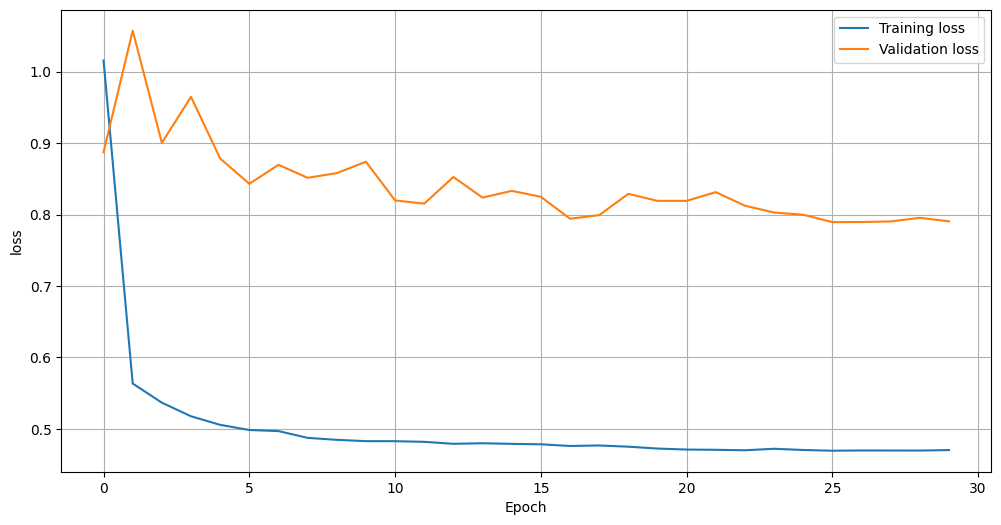

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

Essayons de detecter les elephants dans l'image `/content/test/images/2 (122).jpg`

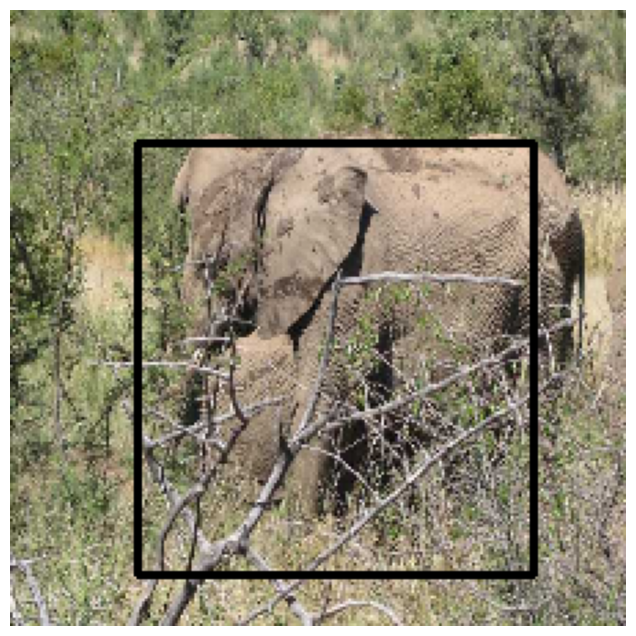

In [ ]:
test_image = load_image("/content/test/images/2 (122).jpg")
test_image = preprocess_image(test_image, (224, 224))
predicted = model(test_image.reshape((1,224,224,3))).numpy()
labels = predicted.reshape((-1, 5))
labels = labels[labels[:,0] > 0.999]
plot_image_with_boxes(test_image, labels.astype(str).tolist())

# 5. Test du modele entraine

## 5.1. Evaluation du modele en utilisant la mAP (Mean Average Precision)

La **mAP** (moyenne de la précision moyenne) est une métrique utilisée pour évaluer la performance des modèles de détection d'objets. Elle prend en compte la précision et le rappel sur plusieurs seuils d'Intersection over Union (IoU).

#### Étapes de calcul :

1. **Calcul de l'IoU** :
   $$
   \text{IoU} = \frac{\text{Aire de l'intersection}}{\text{Aire de l'union}}
   $$

2. **Vérification des prédictions** :
   - Une prédiction est considérée comme un vrai positif (TP) si son IoU avec une vérité de terrain est supérieur à un seuil défini (par exemple, 0.5).
   - Les prédictions non appariées sont considérées comme de faux positifs (FP).

3. **Calcul de la précision et du rappel** :
   $$
   \text{Précision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
   $$
   $$
   \text{Rappel} = \frac{\text{TP}}{\text{Nombre total de vérités de terrain}}
   $$

4. **Calcul de l'AP pour chaque seuil IoU** :
   - L'AP est calculé en intégrant la courbe précision-rappel.

5. **Calcul de la mAP** :
   $$
   \text{mAP} = \frac{1}{N} \sum_{i=1}^{N} \text{AP}_i
   $$
   où \( N \) est le nombre total de seuils IoU.

---

Cette formule et ces étapes vous permettent d'évaluer de manière robuste la performance de votre modèle de détection d'objets.


In [ ]:
test_dataset = CustomDataset(
    annotations_dir='/content/test/labels',
    img_dir='/content/test/images',
    batch_size=batch_size,
    img_size=(224, 224),
    max_num_boxes = max_num_boxes
)

In [ ]:
import numpy as np

def calculate_iou(box1, box2):
    # box format: [x_min, y_min, x_max, y_max]
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Calculate intersection area
    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)

    # Calculate areas of the individual boxes
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Calculate union area
    union_area = box1_area + box2_area - intersection_area

    # Return IoU
    return intersection_area / union_area if union_area != 0 else 0

In [ ]:
def compute_precision_recall(predictions, ground_truths, iou_threshold=0.5):
    # Sort predictions by confidence
    tp, fp = 0, 0
    matched_gt = set()

    precisions = []
    recalls = []

    for pred in predictions:
        pred_box = pred[1:]  # Exclude confidence score
        best_iou = 0
        matched_gt_index = -1

        # Match the prediction to the best ground truth (highest IoU)
        for gt_index, gt_box in enumerate(ground_truths):
            iou = calculate_iou(pred_box, gt_box)
            if iou > best_iou and iou >= iou_threshold and gt_index not in matched_gt:
                best_iou = iou
                matched_gt_index = gt_index

        # Classify as TP or FP
        if matched_gt_index >= 0:
            tp += 1
            matched_gt.add(matched_gt_index)
        else:
            fp += 1

        # Calculate precision and recall
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / len(ground_truths) if len(ground_truths) > 0 else 0
        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls

In [ ]:
def compute_average_precision(precisions, recalls):
    # Sort by recall in ascending order for numerical integration
    recalls, precisions = zip(*sorted(zip(recalls, precisions)))

    # AP Calculation using the Trapezoidal rule
    ap = 0.0
    for i in range(1, len(precisions)):
        ap += (recalls[i] - recalls[i - 1]) * precisions[i]

    return ap

In [ ]:
def compute_map(predictions, ground_truths, iou_thresholds=[0.5, 0.75]):
    aps = []
    for iou_threshold in iou_thresholds:
        precisions, recalls = compute_precision_recall(predictions, ground_truths, iou_threshold)
        ap = compute_average_precision(precisions, recalls)
        aps.append(ap)

    mAP = np.mean(aps)
    return mAP

In [ ]:
import numpy as np

predictions = []
ground_truths = []

# Loop over the batched test dataset
for imgs, labels in test_dataset:
    # Predict for the entire batch at once
    if imgs.shape[0]==0:
      break
    batch_predictions = model.predict(imgs)
    batch_predictions = batch_predictions.reshape((imgs.shape[0], -1, 5))  # Reshape to (batch_size, num_preds, 5)

    # Convert predictions and labels to lists for easy extension
    predictions.extend(batch_predictions.reshape(-1, 5).tolist())  # Flattened list of all predictions
    ground_truths.extend(labels.numpy().tolist())  # Convert labels to list and extend

# Convert lists to numpy arrays
predictions = np.array(predictions)
ground_truths = np.array(ground_truths)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


In [ ]:
mAP = compute_map(predictions, ground_truths, iou_thresholds=[0.999, 0.9999999])
print(f"mAP: {mAP:.4f}")

mAP: 0.0000


## Evaluation en utilisant l'Erreur Quadratique Moyenne (MSE) pour le Comptage d'Objets

L'**Erreur Quadratique Moyenne (MSE)** est une métrique utilisée pour évaluer la précision des prédictions de comptage d'objets de notre modèle. Elle calcule la moyenne des carrés des différences entre les comptages prédits et les comptages réels d'objets dans une image.

La formule de la MSE est :

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

où :
- $( N )$ est le nombre total d'images,
- $( y_i )$ est le nombre réel d'objets dans l'image $( i )$,
- $( \hat{y}_i )$ est le nombre d'objets prédit pour l'image $( i )$.

La MSE pénalise davantage les erreurs importantes car elle élève au carré la différence entre les comptages prédits et réels. Cela signifie que la valeur de MSE augmente fortement lorsque le modèle fait des erreurs de grande amplitude, ce qui la rend utile pour identifier si le modèle a tendance à surestimer ou sous-estimer le nombre d'objets. Une MSE plus faible indique que les prédictions du modèle sont plus proches des comptages réels.


In [ ]:
def extract_counts(prediction, threshold=0.9):
  prediction = prediction[prediction[:,0] > threshold]
  return prediction.shape[0]

In [ ]:
# Assuming model, test_dataset, extract_counts, and calculate_mse are already defined
true_counts = []
pred_counts = []

for imgs, labels in test_dataset:
    if imgs.shape[0] == 0:
        break

    # Predict for the entire batch of images at once
    batch_predictions = model.predict(imgs)
    batch_predictions = batch_predictions.reshape((imgs.shape[0], -1, 5))  # Reshape to (batch_size, num_preds, 5)

    # Process each predicted count and corresponding true count in the batch
    for i in range(imgs.shape[0]):  # Iterate over each image in the batch
        pred_count = extract_counts(batch_predictions[i])
        pred_counts.append(pred_count)

        # Get the true count for the current image
        true_count = tf.reduce_sum(tf.cast(labels[i] != 0, tf.int32)).numpy() // 5
        true_counts.append(true_count)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
def calculate_mse(true_counts, pred_counts):
  true_counts = np.array(true_counts)
  pred_counts = np.array(pred_counts)
  return np.mean((true_counts - pred_counts) ** 2)

In [ ]:
mse = calculate_mse(true_counts, pred_counts)
print(f"MSE: {mse}")

MSE: 2.754385964912281
